#  Breast Cancer Diagnostic
The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Class distribution: 357 benign, 212 malignant. More info about this dataset [here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable

from pandas_profiling import ProfileReport
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

In [2]:
classifiers = [LogisticRegression(),KNeighborsClassifier(),SVC(),
               MLPClassifier(),GaussianNB(),DecisionTreeClassifier(),
              RandomForestClassifier()]

In [3]:
sns.set_style('darkgrid')
%matplotlib inline

## Classes and Functions

In [52]:
def classification_results(x_dat,y_true,y_pred,mod,title=None,results_out= False):

#   print("Results for {}:".format(method.__name__))
    if title != None:
        print("Results for:",title)
    print(classification_report(y_true, y_pred))
    print("Training Accuracy:",
          round(classification_report(y_true, y_pred, output_dict=True)['accuracy'],4))
    print("Training Recall:",
          round(classification_report(y_true, y_pred, output_dict=True)['1']['recall'],4))
    
    
    #print confusion matrix
    sns.set_palette("Paired")
    y_pred_rf = y_pred
    y_true_rf = y_true
    cm = confusion_matrix(y_true_rf, y_pred_rf)
    f, ax = plt.subplots(figsize =(5,5))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="black",
                cmap="RdBu_r",fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_rf")
    plt.ylabel("y_true_rf")
    plt.title('Training Data Confusion Matrix')
    plt.show()
    
    if results_out== True:
        return classification_report(y_true, y_pred, output_dict=True)

In [5]:
def classification(method, x_dat, y_dat, model_out=False,
                   feature_importance=False, results=True,
                   test=False,
                   **params): 
    
    #fit model
    mod = Pipeline([('classify', method(**params))])
    mod.fit(x_dat, y_dat)
    y_pred = mod.predict(x_dat)
    
    if (results == True) and (test == False):
        classification_results(x_dat,y_dat,y_pred,mod,title=method.__name__)
#         #print results
#         print("Results for:",title)
#         print(classification_report(y_dat, y_pred))
#         print("Training Accuracy: {}%".format(round(mod.score(x_dat, y_dat)*100,2)))

#         #print confusion matrix
#         y_pred_rf = y_pred
#         y_true_rf = y_dat
#         cm = confusion_matrix(y_true_rf, y_pred_rf)
#         f, ax = plt.subplots(figsize =(5,5))
#         sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
#         plt.xlabel("y_pred_rf")
#         plt.ylabel("y_true_rf")
#         plt.title('Training Data Confusion Matrix')
#         plt.show()

        if feature_importance == True:
            # Calculate permutation feature importance
            # (n_jobs=-1 means using all processors)
            try:
                imp = permutation_importance(mod, x_dat, y_dat, n_jobs=-1)

                #Generate feature importance plot
                plt.figure(figsize=(12,8))
                importance_data = pd.DataFrame({'feature':x_dat.columns, 'importance':imp.importances_mean})
                sns.barplot(x='importance', y='feature', data=importance_data)
                plt.title('Permutation Feature Importance')
                plt.xlabel('Mean Decrease in F1 Score')
                plt.ylabel('')
                plt.show()
            except:
                print('No Feature Importance Available')
    
    
    if test != False:
        x_test, y_test = test[0], test[1]
        y_pred_test = mod.predict(x_test)
        
        print("Results for {}:".format(method.__name__))
        print(classification_report(y_test, y_pred_test))
        print("Test Accuracy: {}%".format(round(mod.score(x_test, y_test)*100,2)))

        #print confusion matrix
        y_pred_rf = y_pred_test
        y_true_rf = y_test
        cm = confusion_matrix(y_test, y_pred_test)
        f, ax = plt.subplots(figsize =(5,5))
        sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
        plt.xlabel("y_pred_rf")
        plt.ylabel("y_true_rf")
        plt.title('Test Data Confusion Matrix')
        plt.show()
        
    
    if model_out == True:
        return mod

## Data Exploration

### Profile Report

In [6]:
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")

In [7]:
# profile = ProfileReport(cancer_tissues)
# profile

In [8]:
cancer_tissues.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [9]:
cancer_tissues.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
cancer_tissues.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Dropping irrelvant or broken columns 
cancer_tissues.drop(['id','Unnamed: 32'],axis=1,inplace=True)

# Replacing M (Malignant) with 1 and B (Benign) with 0
cancer_tissues['diagnosis'].replace(('M', 'B'), (1, 0), inplace=True)
cancer_tissues['diagnosis'] = cancer_tissues['diagnosis'].astype('category')

# Defining feature and target set as x and y respectively
x, y = cancer_tissues.drop('diagnosis',axis=1), cancer_tissues['diagnosis']

# Defining name for feature columns
feature_cols = x.columns

In [12]:
cancer_tissues.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


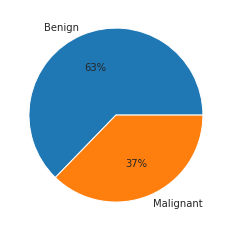

In [13]:
plt.pie(cancer_tissues['diagnosis'].value_counts(), labels = ['Benign','Malignant'], autopct='%.0f%%', colors = sns.color_palette('tab10'))
plt.show()

### Histograms

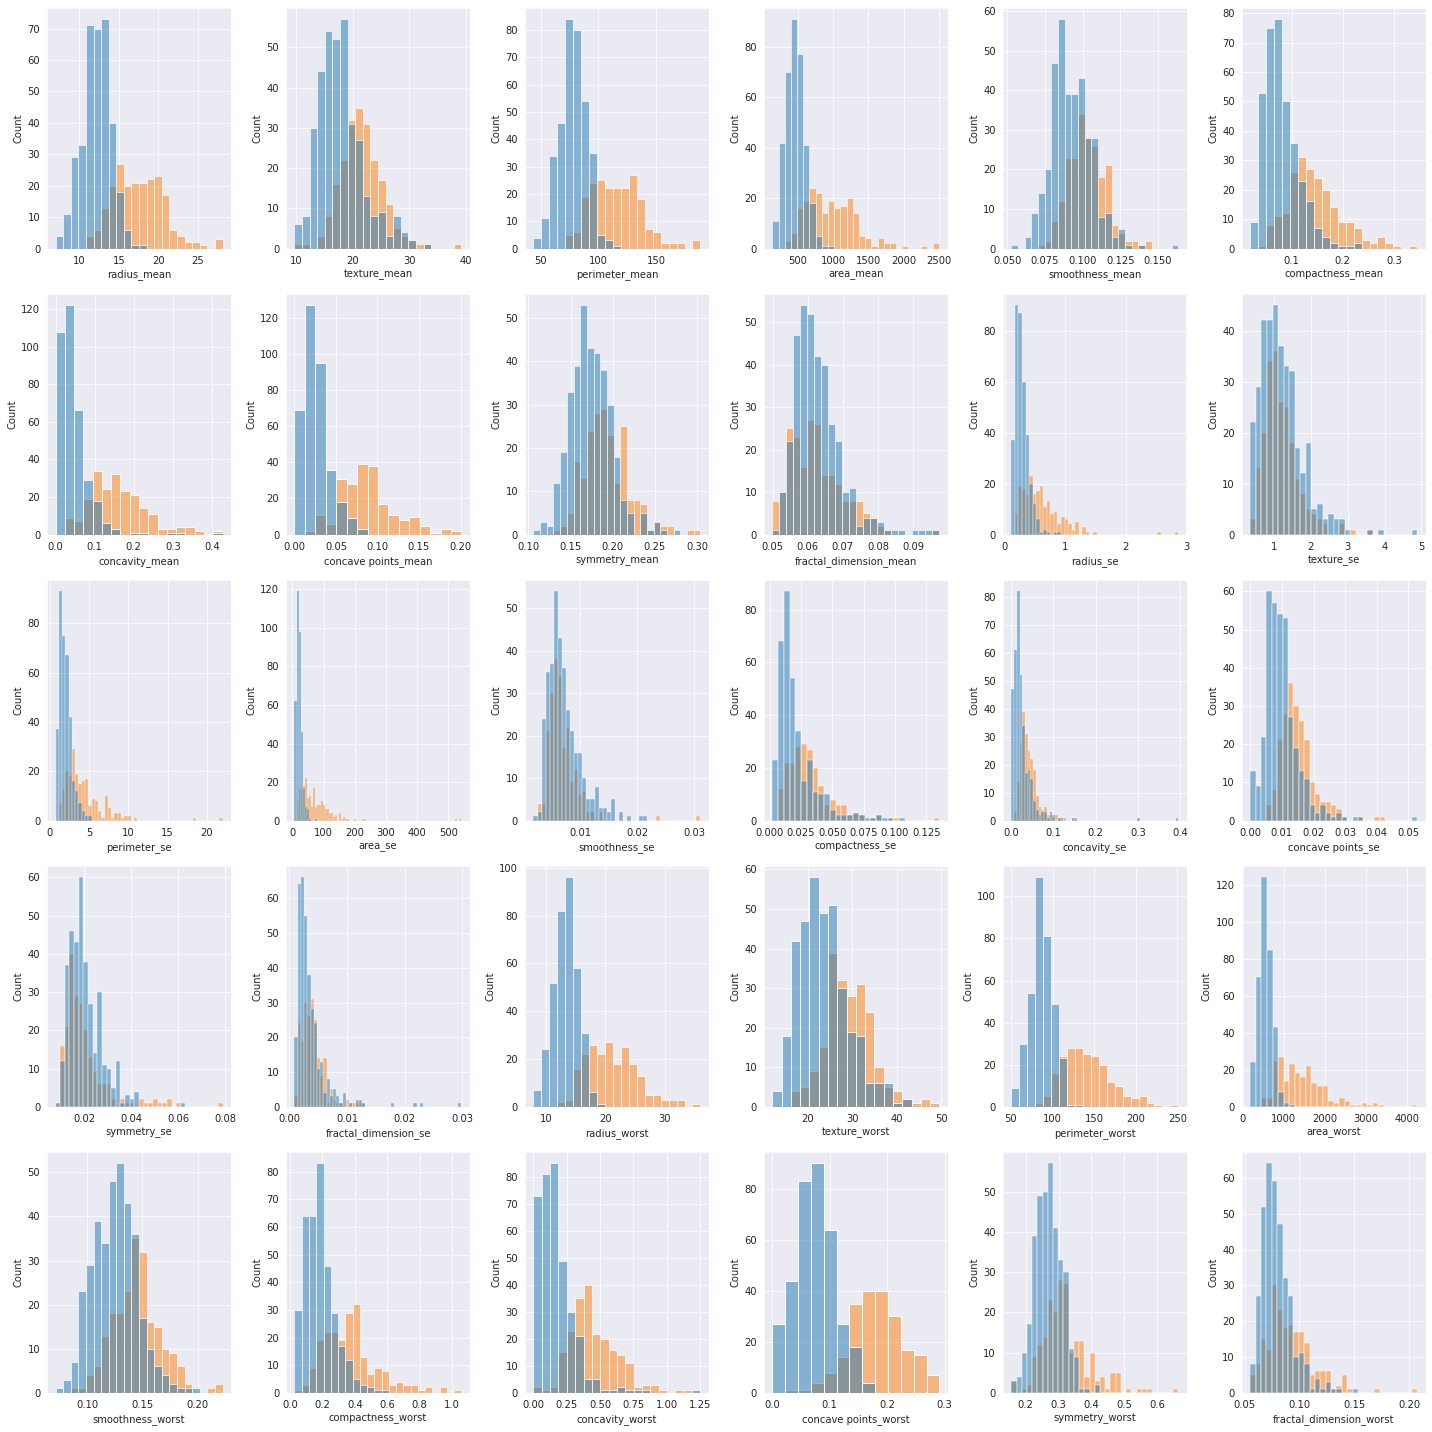

In [14]:
count=1
plt.subplots(figsize=(20, 20))

for i in x.columns:
    plt.subplot(5,6,count)
    sns.histplot(data=cancer_tissues, hue='diagnosis', x = i,palette="tab10")\
        .legend([],[], frameon=False)
    count+=1


plt.tight_layout()
plt.show()

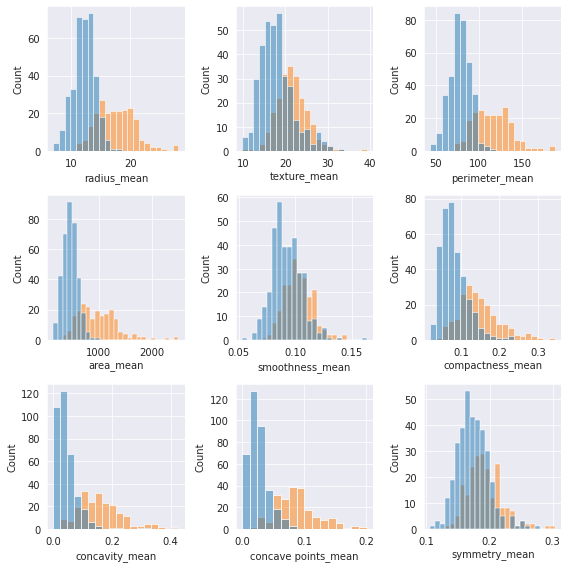

In [15]:
count=1
plt.subplots(figsize=(8, 8))
sns.color_palette("tab10")
for i in x.columns[:9]:
    plt.subplot(3,3,count)
    sns.histplot(data=cancer_tissues, hue='diagnosis', x = i,palette="tab10")\
        .legend([],[], frameon=False)
    count+=1


plt.tight_layout()
plt.show()

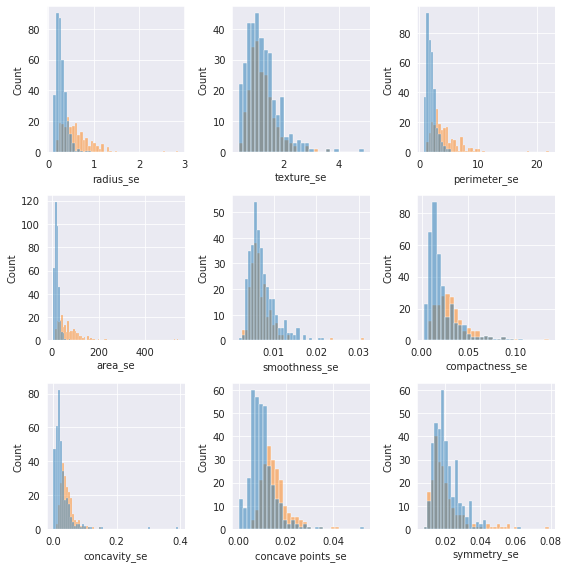

In [16]:
count=1
plt.subplots(figsize=(8, 8))
sns.color_palette("tab10")
for i in x.columns[10:19]:
    plt.subplot(3,3,count)
    sns.histplot(data=cancer_tissues, hue='diagnosis', x = i,palette="tab10")\
        .legend([],[], frameon=False)
    count+=1


plt.tight_layout()
plt.show()

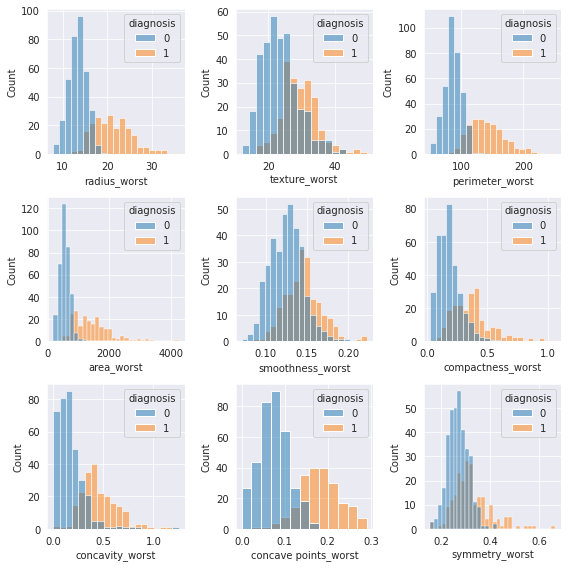

In [17]:
count=1
plt.subplots(figsize=(8, 8))
sns.color_palette("tab10")
for i in x.columns[20:29]:
    plt.subplot(3,3,count)
    sns.histplot(data=cancer_tissues, hue='diagnosis', x = i,palette="tab10")
    count+=1


plt.tight_layout()
plt.show()

The Cell Nuclei data seems to have fairly normal distribution regarding the "mean" measurements of the cell. Here 0 (blue) represents Benign cells and 1 (red) is Malignant. Malignant cells seem to have a higher value distribution for "mean" measurements.

### Boxplots

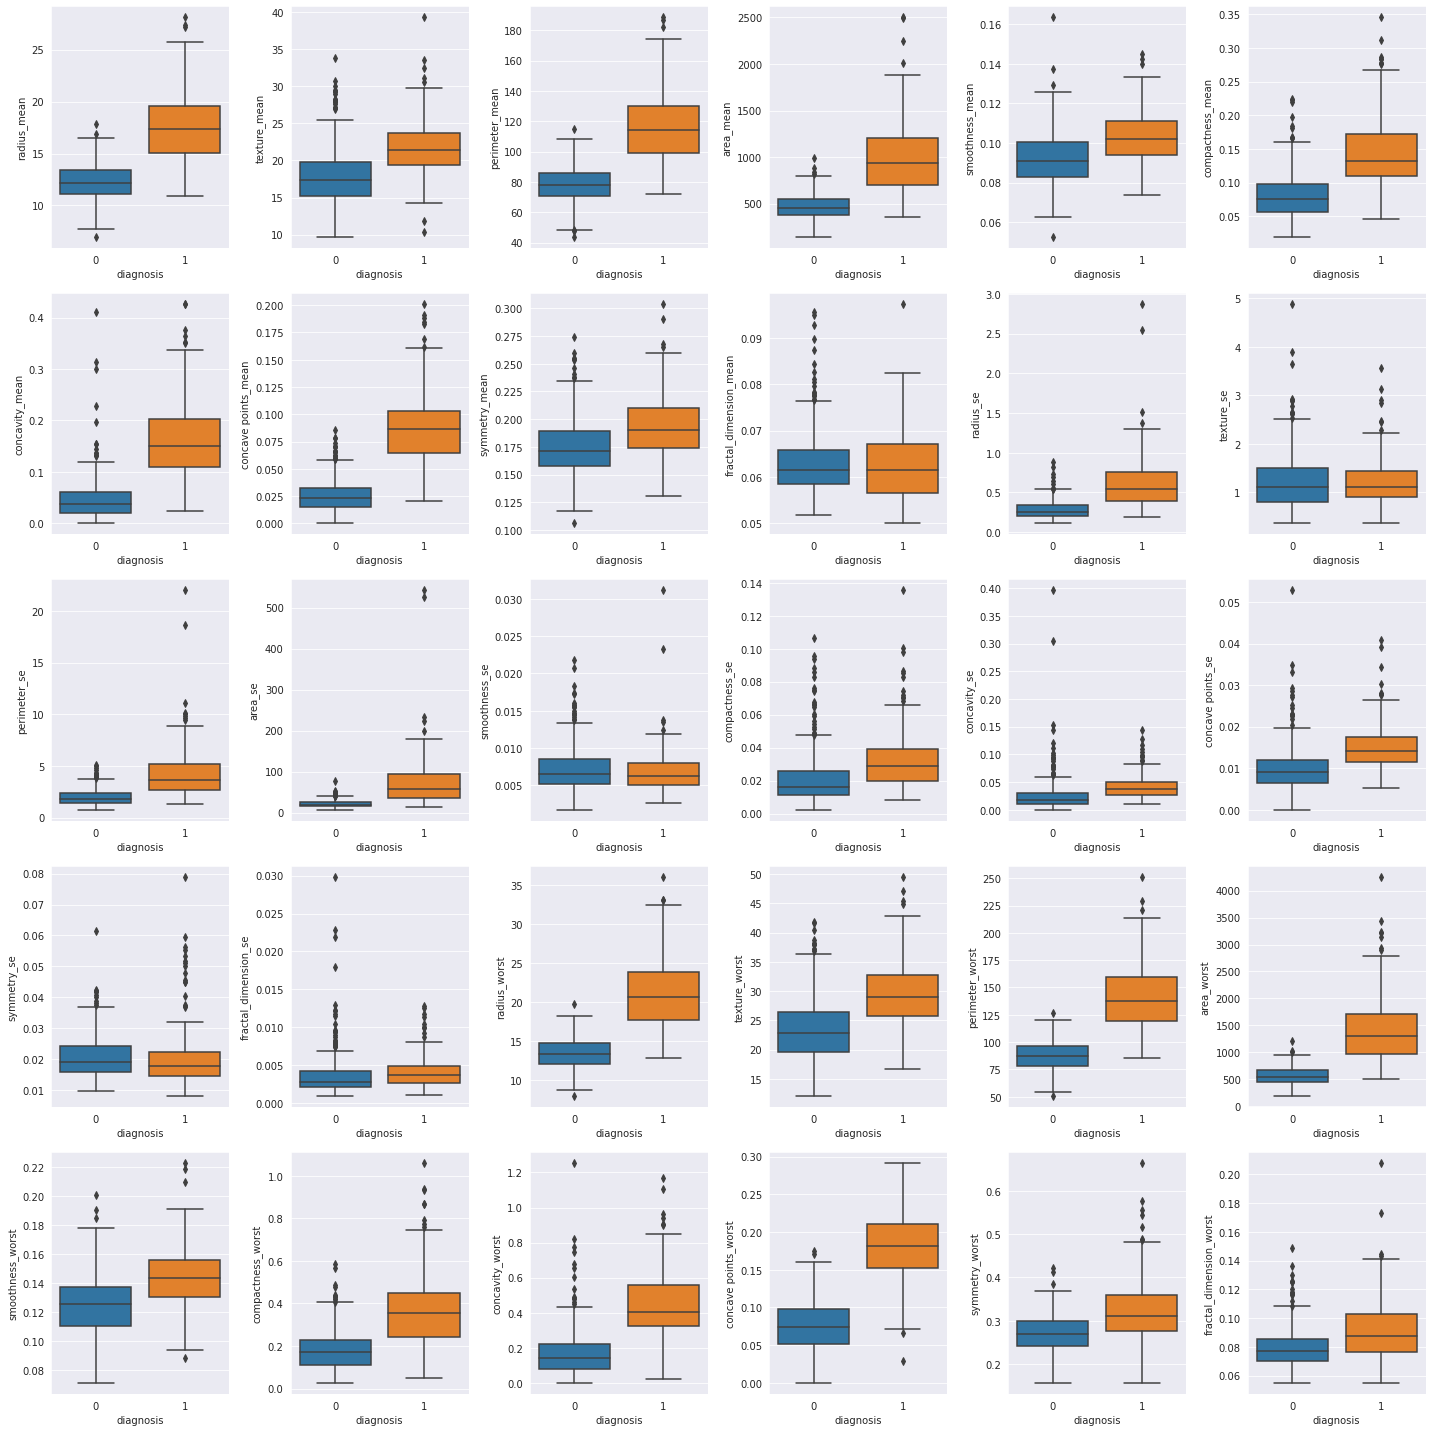

In [18]:
count=1
plt.subplots(figsize=(20, 20))

for i in x.columns:
    plt.subplot(5,6,count)
    sns.boxplot(data=cancer_tissues, x='diagnosis', y = i,palette="tab10")
    count+=1
    
plt.tight_layout()
plt.show()

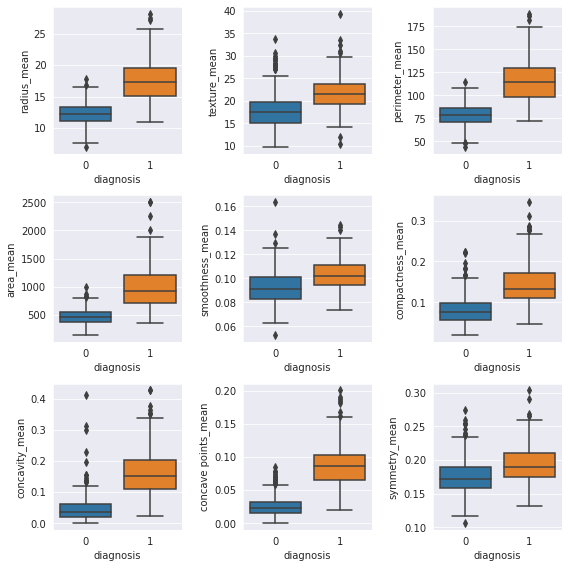

In [19]:
count=1
plt.subplots(figsize=(8, 8))

for i in x.columns[:9]:
    plt.subplot(3,3,count)
    sns.boxplot(data=cancer_tissues, x='diagnosis', y = i,palette="tab10")
    count+=1
    
plt.tight_layout()
plt.show()

Looks like we might have some outliers from the barplots

### Violin Plot

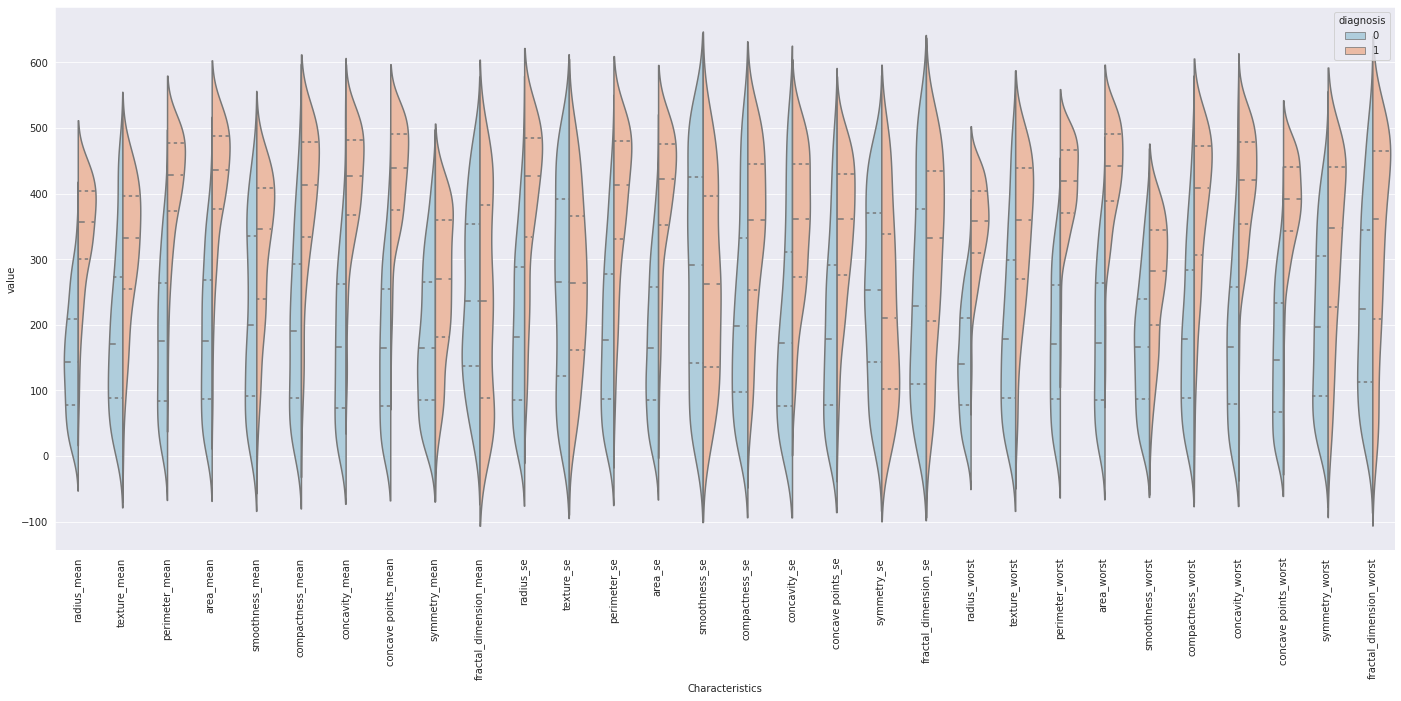

In [20]:
labelencoder=LabelEncoder() # Must encode for this plot type

cancer_tissues_encoded = cancer_tissues.copy()
for column in cancer_tissues_encoded.columns:
    cancer_tissues_encoded[column] = labelencoder.fit_transform(cancer_tissues_encoded[column])

df_div = pd.melt(cancer_tissues_encoded,
                 'diagnosis', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(24,10))

p = sns.violinplot(ax = ax, x='Characteristics', y='value',
                   hue='diagnosis', split = True, data=df_div,
                   inner = 'quartile', palette = 'RdBu_r')

df_no_class = cancer_tissues.drop('diagnosis',axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns))
# ax.set_title('Violin Plot of Mushroom Edibility by Feature')
sns.set(font_scale=1.8)
plt.show()

Violin Plot isn't showing a ton of outliers though some are apparent in the "se" and "worst" variables

### Outlier Detection

In [21]:
Iso = IsolationForest(random_state=7)

Iso.fit(x)
pred_iso = Iso.predict(x)

x['anomaly'] = pred_iso

outliers=x.loc[x['anomaly']==-1]
outlier_index=list(outliers.index)

print(x['anomaly'].value_counts())

 1    517
-1     52
Name: anomaly, dtype: int64


It appears from the above analysis that 517 values are considered normal and 52 could be considered outliers

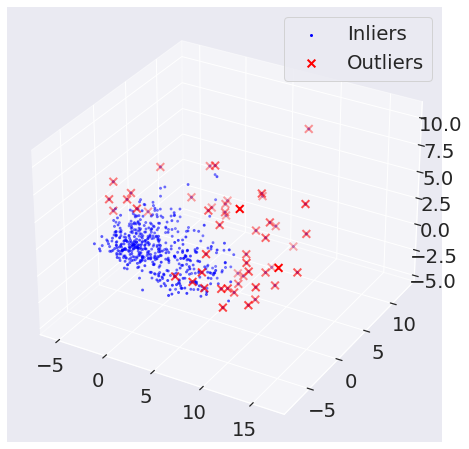

In [22]:
# To represent outliers visually a 3D PCA is needed
pca3 = PCA(n_components=3)
scaler = StandardScaler()

# Normalize the metrics
X3 = scaler.fit_transform(x)
X_reduce = pca3.fit_transform(X3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Inliers
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="Inliers",c="blue")
# Outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="Outliers")
# Adding Grid
ax.grid(True)
ax.w_xaxis.pane.set_color('w')
ax.w_yaxis.pane.set_color('w')
ax.w_zaxis.pane.set_color('w')
plt.rcParams['grid.color'] = "black"
plt.rcParams['lines.linewidth'] = 1
ax.legend()
plt.show()

### Correlation Matrix

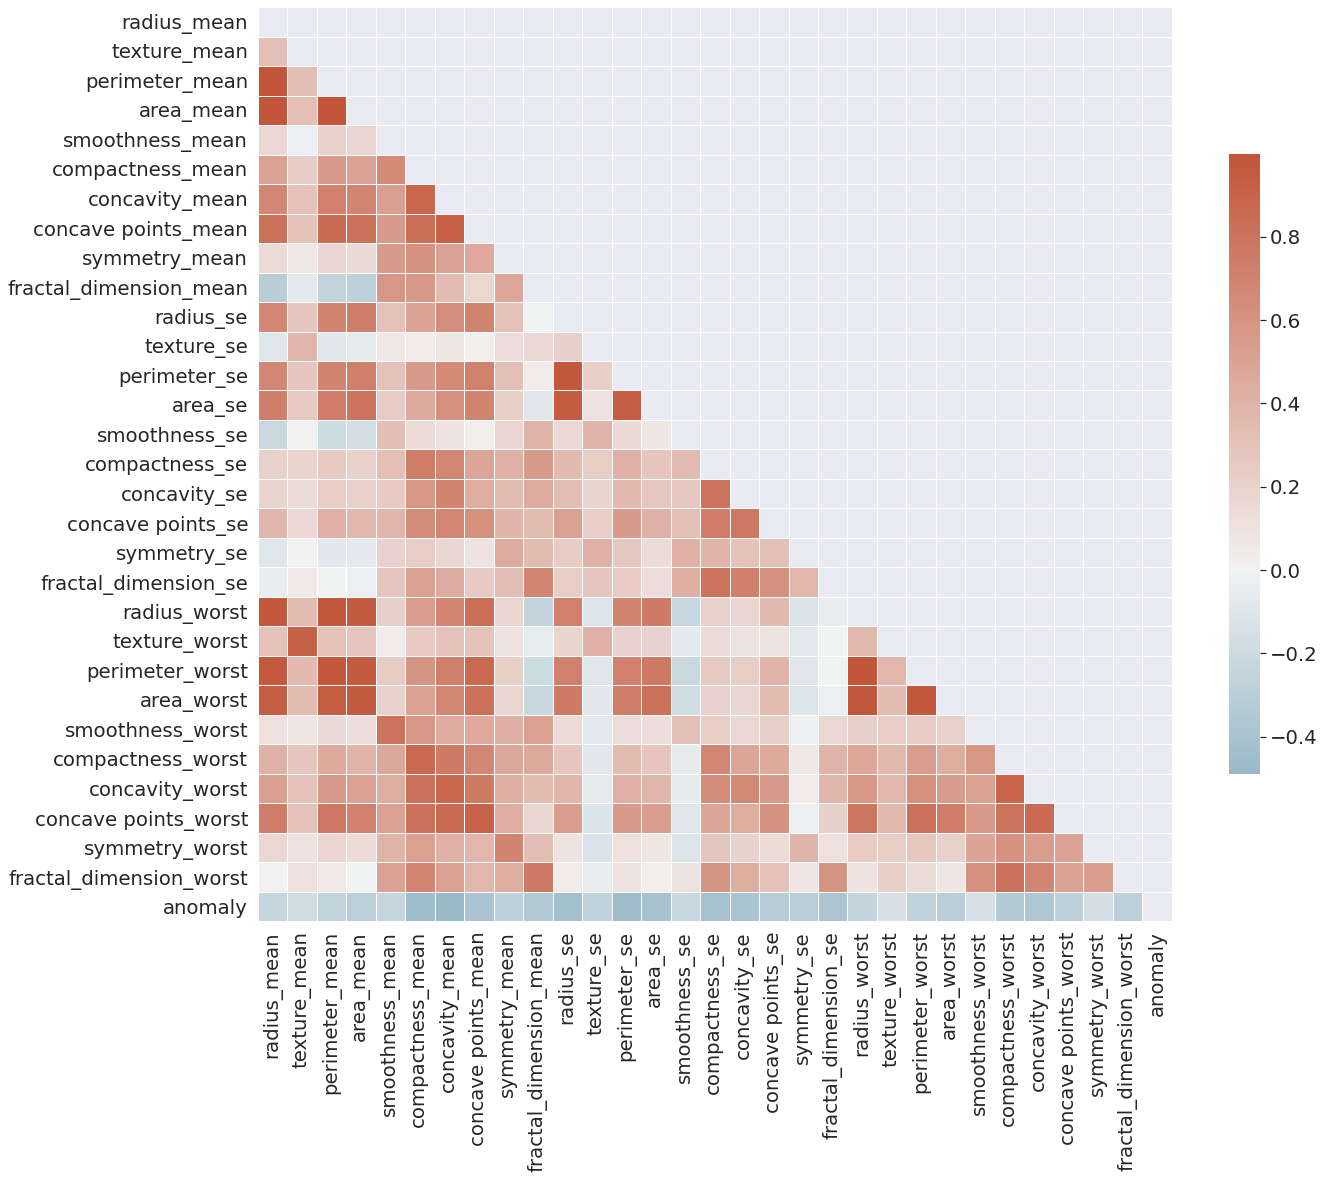

In [23]:
plt.subplots(figsize=(20, 20))

corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.tight_layout()

In [24]:
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,anomaly
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.240018
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.192889
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.265701
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.299856
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.242878
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.459754
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.490251
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.401350
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.286236
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.347541


There are at least a few variables that have high correlation (greater than 0.9), so we should look at dimensionality reduction as well

## Feature Engineering

### Feature Scaling

To avoid outliers impacting feature scaling, Robust Data Scaling must be used. This will also help us mitigate the impact of outliers on the model overall.

In [25]:
scaler = RobustScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,anomaly
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.185611,0.079867,0.198031,0.286394,0.025900,0.178848,0.269521,0.287188,0.058043,0.149360,...,0.030929,0.232531,0.341275,0.036347,0.220766,0.169480,0.152133,0.116675,0.189419,-0.182777
std,0.863737,0.763950,0.839923,0.971065,0.742954,0.806548,0.788212,0.722720,0.811073,0.838523,...,0.711372,0.813818,1.001155,0.776613,0.819888,0.777289,0.681376,0.916555,0.875910,0.576828
min,-1.565931,-1.621670,-1.467335,-1.124724,-2.284205,-1.118662,-0.608464,-0.623952,-2.165680,-1.375297,...,-1.549769,-1.144345,-0.881484,-2.045238,-0.962011,-0.844635,-1.035866,-1.862222,-1.212415,-2.000000
25%,-0.409314,-0.474245,-0.382648,-0.360927,-0.501849,-0.423183,-0.316195,-0.245670,-0.511834,-0.456057,...,-0.501157,-0.328167,-0.301037,-0.500000,-0.337155,-0.418033,-0.362807,-0.471111,-0.416101,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.590686,0.525755,0.617352,0.639073,0.498151,0.576817,0.683805,0.754330,0.488166,0.543943,...,0.498843,0.671833,0.698963,0.500000,0.662845,0.581967,0.637193,0.528889,0.583899,0.000000
max,3.612745,3.630551,3.534739,5.380519,3.567353,3.860263,3.611430,3.123487,3.692308,4.263658,...,2.792824,3.718576,6.273079,3.105442,4.409067,3.820045,1.980616,5.653333,6.181377,0.000000


### Dimensionality Reduction

PCA is a great initial method for factor analysis

+-----------------------+--------------------------------+-------------+
| Number of Components: | Cumulative Explained Variance: | Eigenvalue: |
+-----------------------+--------------------------------+-------------+
|           1           |             0.447              |    11.674   |
|           2           |             0.641              |    5.071    |
|           3           |             0.743              |    2.663    |
|           4           |             0.798              |    1.445    |
|           5           |             0.843              |    1.188    |
|           6           |             0.881              |    0.984    |
|           7           |             0.907              |    0.687    |
|           8           |             0.923              |    0.411    |
|           9           |             0.938              |     0.38    |
|           10          |             0.949              |    0.293    |
|           11          |             0.959        

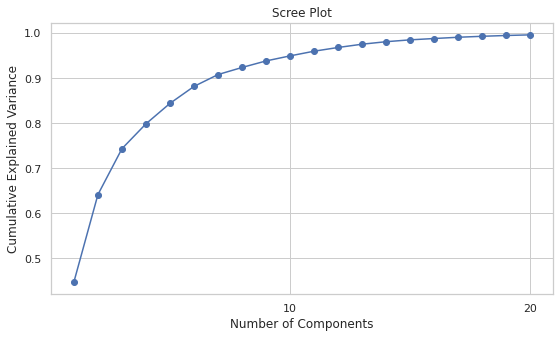

In [26]:
# Guessing less than 20 components
pca20 = PCA(n_components=20)
principalComponents = pca20.fit_transform(x_scaled)

# Creating a pretty table for results
table = [['Number of Components:','Cumulative Explained Variance:','Eigenvalue:']]
tab = PrettyTable(table[0])
for i in range(len(pca20.explained_variance_ratio_.cumsum())):
    table.append([i+1,pca20.explained_variance_ratio_.cumsum()[i].round(3),
                 pca20.explained_variance_[i].round(3)])
    
tab.add_rows(table[1:])
print(tab)
    
figure=plt.figure(figsize=(9,5))
sns.set_theme(style = "whitegrid")
plt.plot(range(1,21),pca20.explained_variance_ratio_.cumsum(),marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.locator_params(axis='x', nbins=4)

plt.grid(True)
plt.show()

The "elbow" on the Scree Plot appears to be around 6 or 7 principal components, indicating **6** or **7** components should be used.  Kaiser's Rule instructs users to drop all components with eigenvalues under 1, indicating **6** components should be used.  

Since 7 components explains > 90% of variance and choosing 6 or 7 components vs 30 seemed abritrary, I decided to move forward with **7** components for the extra explained variance in this PCA.

### Train Test Split

In [27]:
# Train Test split of 70:30
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,
                                test_size = 0.3, random_state = 7)

In [28]:
pca7 = PCA(n_components=7)
pca_columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7']

# Transforming both x_train and x_test into PCA versions.
x_train_pca = pd.DataFrame(pca7.fit_transform(x_train), columns = pca_columns)
x_test_pca = pd.DataFrame(pca7.transform(x_test), columns = pca_columns)

## Analysis

### Analysis Techniques

__________________________________________________
--------------------------------------------------
Results for: LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       241
           1       0.99      0.96      0.97       157

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Training Accuracy: 0.9799


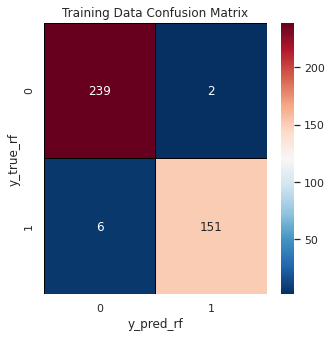

__________________________________________________
--------------------------------------------------
Results for: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       241
           1       0.96      0.96      0.96       157

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Training Accuracy: 0.9673


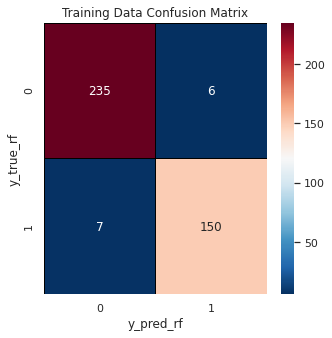

__________________________________________________
--------------------------------------------------
Results for: SVC
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       241
           1       0.98      0.96      0.97       157

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Training Accuracy: 0.9749


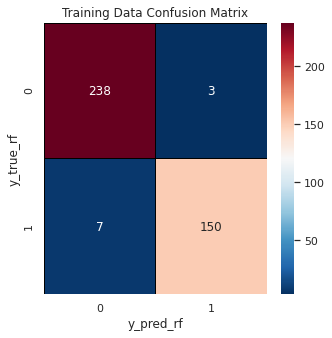

__________________________________________________
--------------------------------------------------
Results for: MLPClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       241
           1       0.99      0.98      0.98       157

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Training Accuracy: 0.9874


/home/pogags/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


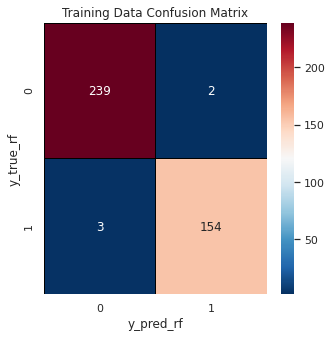

__________________________________________________
--------------------------------------------------
Results for: GaussianNB
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       241
           1       0.95      0.90      0.93       157

    accuracy                           0.94       398
   macro avg       0.95      0.94      0.94       398
weighted avg       0.94      0.94      0.94       398

Training Accuracy: 0.9447


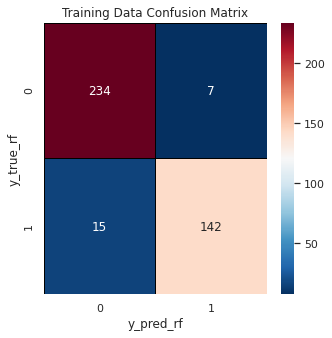

__________________________________________________
--------------------------------------------------
Results for: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       157

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Training Accuracy: 1.0


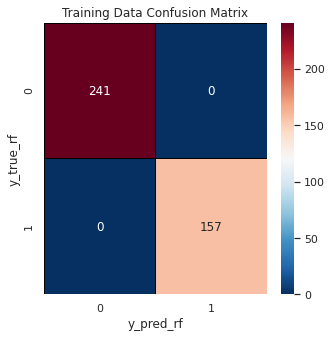

__________________________________________________
--------------------------------------------------
Results for: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       157

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Training Accuracy: 1.0


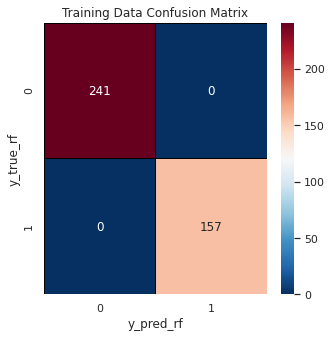

In [29]:
classifiers = [LogisticRegression, KNeighborsClassifier, SVC,
               MLPClassifier, GaussianNB, DecisionTreeClassifier,
              RandomForestClassifier]

for cls in classifiers:
    print('_' * 50)
    print('-' * 50)
    classification(cls,x_train_pca,y_train)

Random Forest, Decision Tree, MLP Classifier, and LogisticRegression performed the best. Overfitting is a concern on the Decision Tree, so I opted to move forward with the **Random Forest, MLP, and Logistic Regression** analysis techniques.

In [30]:
### Changing the test variable to a tuple of the test data allows one to train
# test the data in one line. Changing model_out to True returns the fit model

RFmod = classification(RandomForestClassifier,x_train_pca,y_train, model_out=True,
                        random_state = 7, results=False)
# print('_' * 50)
# print('-' * 50)
MLPmod = classification(MLPClassifier,x_train_pca,y_train, model_out=True,
                        random_state = 7, results=False)
# print('_' * 50)
# print('-' * 50)
Logmod = classification(LogisticRegression,x_train_pca,y_train, model_out=True,
                        random_state = 7, results=False)

# Constructing these models in case we want them later

/home/pogags/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Cross Validation

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
print("Random Forest cross val score accuracy is:",
      np.mean(cross_val_score(RFmod, x_train_pca, y_train, cv = 5)).round(5))
print("MLP cross val score accuracy is:",
      np.mean(cross_val_score(MLPmod, x_train_pca, y_train, cv = 5)).round(5))
print("Logistic Regression cross val score accuracy is:",
      np.mean(cross_val_score(Logmod, x_train_pca, y_train, cv = 5)).round(5))

Random Forest cross val score accuracy is: 0.93972
MLP cross val score accuracy is: 0.96741
Logistic Regression cross val score accuracy is: 0.97241


After crossvalidation, MLP and logistic regression seem to be the winner here. Lets see if we can eliminate more error and if possible focus on eliminating False Negatives which have more importance in this machine learning task, and to do so we may want to prioritize recall since that minimizes false negatives.

First lets attempt a GSCV to see how tight we can get results

## Model Tuning - MLP

### Grid Search Cross Validation

In [33]:
params = {
    'hidden_layer_sizes': [(100,), (50,50), (50,50,50),
                           (50,100,50), (100,100,50)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.0005, 0.005, 0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [100,200,400]
}

In [34]:
gscv_MLP_accuracy = GridSearchCV(estimator=MLPClassifier(),param_grid=params,
                                 n_jobs=3, scoring = 'accuracy')
gscv_MLP_accuracy.fit(x_train_pca,y_train)

print(gscv_MLP_accuracy.best_estimator_)
print(gscv_MLP_accuracy.best_params_)

MLPClassifier(activation='logistic', alpha=0.005,
              hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
              max_iter=100)
{'activation': 'logistic', 'alpha': 0.005, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


Results for Accuracy Optimized Multi-Layer Perceptron GSCV
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       241
           1       0.98      0.97      0.97       157

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Training Accuracy: 0.9799


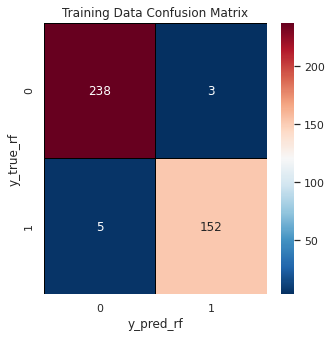

In [35]:
y_pred_accuracy = gscv_MLP_accuracy.predict(x_train_pca)

print("Results for Accuracy Optimized Multi-Layer Perceptron GSCV")
classification_results(x_train_pca,y_train,y_pred_accuracy,gscv_MLP_accuracy)

In [36]:
gscv_MLP_recall = GridSearchCV(estimator=MLPClassifier(),param_grid=params,
                               n_jobs=3, scoring = 'recall')
gscv_MLP_recall.fit(x_train_pca,y_train)

print(gscv_MLP_recall.best_estimator_)
print(gscv_MLP_recall.best_params_)

MLPClassifier(alpha=0.005, learning_rate='adaptive', max_iter=100)
{'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


Results for Recall Optimized Multi-Layer Perceptron GSCV
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       241
           1       0.97      0.96      0.96       157

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Training Accuracy: 0.9724


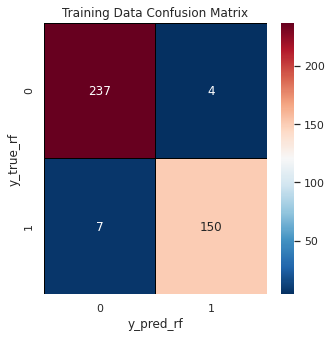

In [37]:
y_pred_recall = gscv_MLP_recall.predict(x_train_pca)

print("Results for Recall Optimized Multi-Layer Perceptron GSCV")
classification_results(x_train_pca,y_train,y_pred_recall,gscv_MLP_recall)

The recall optimized GSCV model actually performed better overall on accuracy and recall. We can see if we can reduce recall even more by changing the classificaition threshold. 

### Thresholds

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       241
           1       0.93      0.99      0.96       157

    accuracy                           0.96       398
   macro avg       0.96      0.97      0.96       398
weighted avg       0.97      0.96      0.96       398

Training Accuracy: 0.9648
Training Recall: 0.9873


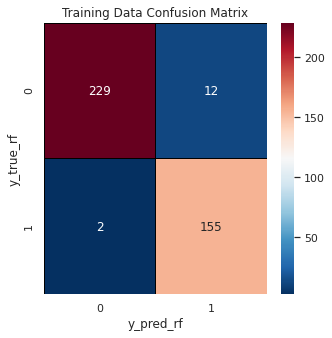

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       241
           1       0.93      0.98      0.96       157

    accuracy                           0.96       398
   macro avg       0.96      0.97      0.96       398
weighted avg       0.97      0.96      0.96       398

Training Accuracy: 0.9648
Training Recall: 0.9809


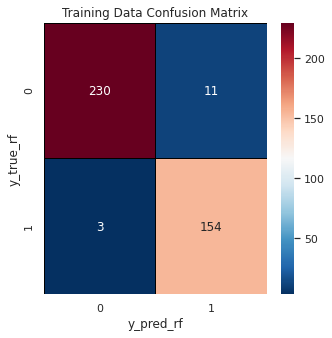

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       241
           1       0.96      0.98      0.97       157

    accuracy                           0.97       398
   macro avg       0.97      0.98      0.97       398
weighted avg       0.98      0.97      0.97       398

Training Accuracy: 0.9749
Training Recall: 0.9809


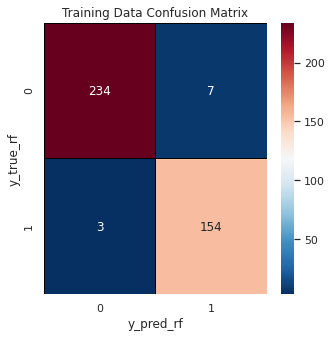

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       241
           1       0.96      0.97      0.97       157

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Training Accuracy: 0.9749
Training Recall: 0.9745


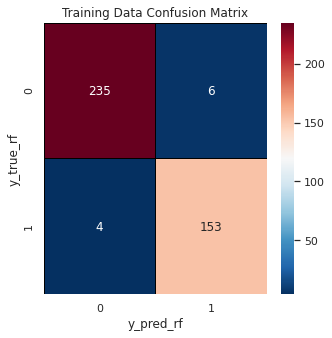

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       241
           1       0.97      0.96      0.96       157

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Training Accuracy: 0.9724
Training Recall: 0.9554


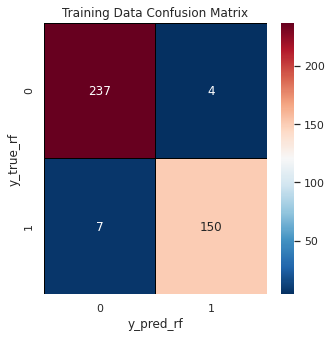

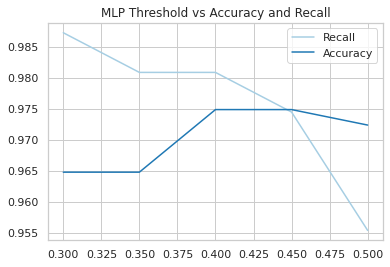

In [56]:
thresh = [0.3,0.35,0.4,0.45,0.5]

accuracy=[]
recall=[]

# Using the MLP GSCV Recall Optimized Model
for t in thresh:
    print('_' * 50)
    print('-' * 50)
    y_pred_thresh = (gscv_MLP_recall.predict_proba(x_train_pca)[:,1] >= t).astype(bool)
    classification_results(x_train_pca,y_train,y_pred_thresh,gscv_MLP_recall, title=t)

    accuracy.append(round(classification_report(y_train, y_pred_thresh, output_dict=True)['accuracy'],4))
    recall.append(round(classification_report(y_train, y_pred_thresh, output_dict=True)['1']['recall'],4))
    

plt.plot(thresh,recall, label="Recall")
plt.plot(thresh,accuracy, label = 'Accuracy')
plt.title("MLP Threshold vs Accuracy and Recall")
plt.legend()
plt.show()   

A threshold of **0.35** maximized accuracy while minimizing recall (considering the 1s a positive and 0s and negative)

Finally lets try this on testing data.

### Final MLP Model

Results for: MLP Recall Optimized Model
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       116
           1       1.00      0.93      0.96        55

    accuracy                           0.98       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171

Training Accuracy: 0.9766
Training Recall: 0.9273


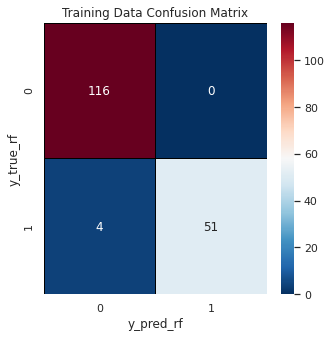

In [61]:
my_thresh = 0.35

y_pred_test_thresh = (gscv_MLP_recall.predict_proba(x_test_pca)[:,1] >= my_thresh).astype(bool)

final_mlp = classification_results(x_test_pca,y_test,y_pred_test_thresh,gscv_MLP_recall, title="MLP Recall Optimized Model")

## Model Tuning - Logistic Regression

### Grid Search Cross Validation

In [40]:
c_space = np.logspace(-5, 8, 15)

params2 = {
    'penalty': ['l1','l2','elasticnet'],
    'C': c_space,
    'solver': ['sag','saga','lbfgs']
}

In [62]:
gscv_Log_accuracy = GridSearchCV(estimator=LogisticRegression(),param_grid=params2,
                                 n_jobs=3, scoring = 'accuracy')
gscv_Log_accuracy.fit(x_train_pca,y_train)

print(gscv_Log_accuracy.best_estimator_)
print(gscv_Log_accuracy.best_params_)

TypeError: __init__() got an unexpected keyword argument 'random_state'

Results for Accuracy Optimized Multi-Layer Perceptron GSCV
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       241
           1       0.99      0.96      0.97       157

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Training Accuracy: 0.9799
Training Recall: 0.9618


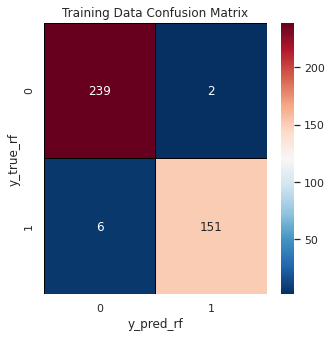

In [54]:
y_pred_accuracy = gscv_Log_accuracy.predict(x_train_pca)

print("Results for Accuracy Optimized Multi-Layer Perceptron GSCV")
classification_results(x_train_pca,y_train,y_pred_accuracy,gscv_Log_accuracy)

In [43]:
gscv_Log_recall = GridSearchCV(estimator=LogisticRegression(),param_grid=params2,
                               n_jobs=3, scoring = 'recall')
gscv_Log_recall.fit(x_train_pca,y_train)

print(gscv_Log_recall.best_estimator_)
print(gscv_Log_recall.best_params_)

LogisticRegression(C=3.727593720314938, solver='sag')
{'C': 3.727593720314938, 'penalty': 'l2', 'solver': 'sag'}


Results for Recall Optimized Multi-Layer Perceptron GSCV
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       241
           1       0.97      0.96      0.96       157

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Training Accuracy: 0.9724


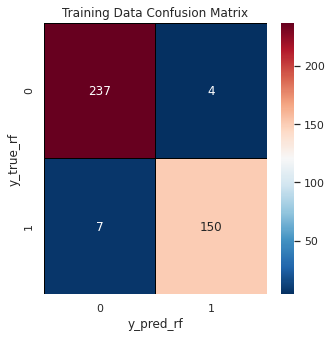

In [44]:
y_pred_recall = gscv_MLP_recall.predict(x_train_pca)

print("Results for Recall Optimized Multi-Layer Perceptron GSCV")
classification_results(x_train_pca,y_train,y_pred_recall,gscv_MLP_recall)

These have the same accuracy but the accuracy optimized model actually has one less false negative, so we will use that for threshold tuning.

### Threshold Tuning

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       241
           1       0.92      0.97      0.95       157

    accuracy                           0.96       398
   macro avg       0.95      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398

Training Accuracy: 0.9573


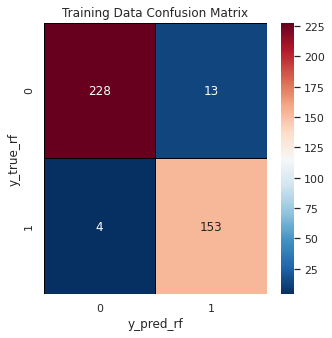

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       241
           1       0.94      0.97      0.96       157

    accuracy                           0.97       398
   macro avg       0.96      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Training Accuracy: 0.9673


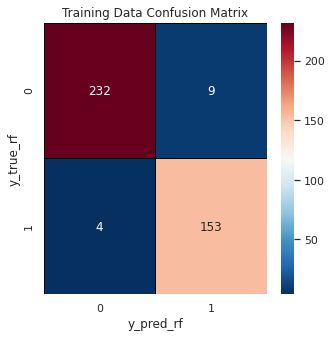

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       241
           1       0.96      0.97      0.96       157

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Training Accuracy: 0.9698


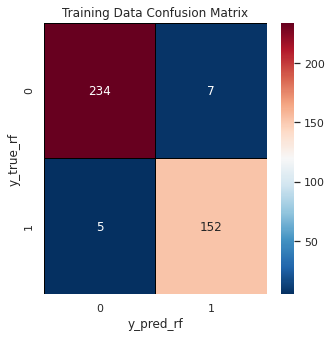

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       241
           1       0.97      0.97      0.97       157

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Training Accuracy: 0.9774


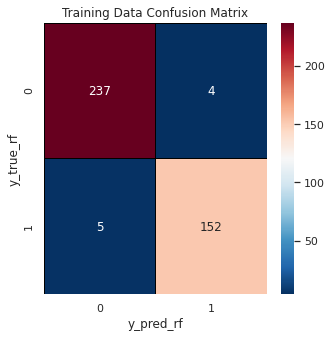

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       241
           1       0.99      0.96      0.97       157

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Training Accuracy: 0.9799


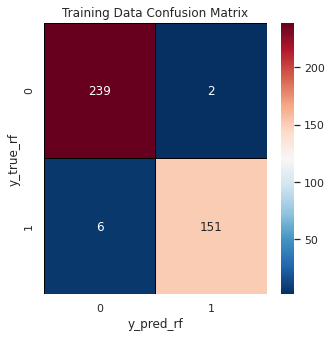

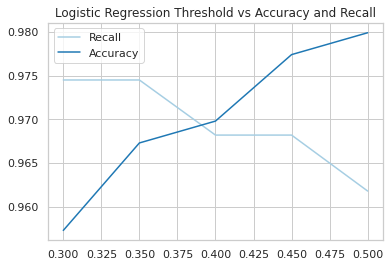

In [45]:
thresh = [0.3,0.35,0.4,0.45,0.5]

accuracy=[]
recall=[]

# Using the LogReg GSCV Accuracy Optimized Model
for t in thresh:
    print('_' * 50)
    print('-' * 50)
    y_pred_thresh = (gscv_Log_accuracy.predict_proba(x_train_pca)[:,1] >= t).astype(bool)
    classification_results(x_train_pca,y_train,y_pred_thresh,gscv_Log_accuracy, title=t)
    
    accuracy.append(round(classification_report(y_train, y_pred_thresh, output_dict=True)['accuracy'],4))
    recall.append(round(classification_report(y_train, y_pred_thresh, output_dict=True)['1']['recall'],4))
    
    
plt.plot(thresh,recall, label="Recall")
plt.plot(thresh,accuracy, label = 'Accuracy')
plt.title("Logistic Regression Threshold vs Accuracy and Recall")
plt.legend()
plt.show()   

The best threshold tradeoff is again **0.35**

### Final Logistic Regression Model

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       116
           1       0.98      0.93      0.95        55

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Training Accuracy: 0.9708
Training Recall: 0.9273


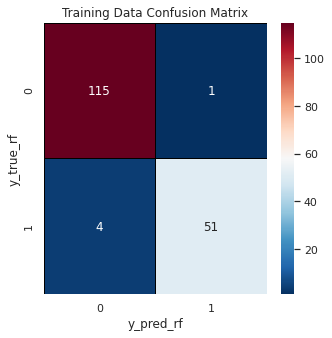

In [53]:
my_thresh = 0.35

y_pred_test_thresh = (gscv_Log_accuracy.predict_proba(x_test_pca)[:,1] >= my_thresh).astype(bool)

final_log=classification_results(x_test_pca,y_test,y_pred_test_thresh,gscv_Log_accuracy, title="Logistic Regression Accuracy Optimized Model")